<a href="https://colab.research.google.com/github/sajad95/Heat/blob/main/PostProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('dark')
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from numpy import hstack
from google.colab import drive
# mounting google drive and uploading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame
from pandas import concat
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv2D, MaxPooling2D, Flatten,Conv1D,Dropout
# saving and loading the .h5 model
from keras.models import Model
# define the model architecture
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import LSTM, Dropout, Dense, Input, Dot, Activation
from keras.layers import SimpleRNN
#####
from keras import backend as K
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
# make the model reproducible Ask Luc
import time
import os
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Input
from keras.optimizers import Adam
from keras.losses import Huber
from keras import backend as K


In [ ]:
drive.mount('/content/saj')

Drive already mounted at /content/saj; to attempt to forcibly remount, call drive.mount("/content/saj", force_remount=True).


In [ ]:
class Metric:
    def __init__(self):
        self.metrics = pd.DataFrame(columns=['R-squared', 'MAE', 'MSE',  'CVRMSE'])

    def add(self, y_true, y_pred):
        residuals = y_true - y_pred
        ss_res = np.sum(residuals ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        mae = np.mean(np.abs(residuals))
        mse = np.mean(residuals ** 2)
        #mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        rmse = np.sqrt(mse)
        cvrmse = (rmse / np.mean(y_true)) * 100
        self.metrics.loc[len(self.metrics)] = [r_squared, mae, mse,  cvrmse]

    def get(self):
        return self.metrics

# make the results reproducible
def split_data2(data, first_fraction, second_fraction=None):
    n_total = len(data)
    n_first_split = round(n_total * first_fraction)

    first_split = data[:n_first_split]

    if second_fraction is None:
        second_split = data[n_first_split:]
    else:
        n_second_split = round(n_total * second_fraction)
        second_split = data[n_first_split:n_first_split+n_second_split]

    return first_split, second_split

def split_data(series):
    """Splits input series into train, val and test.
    """
    train_data = series[0:26280]
    test_data = series[26280:35040]
    return train_data, test_data
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

def R_squared(y_true, y_pred):
    residuals = y_true - y_pred
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Data is splitted with thime (Miroslava)
def load_data(col=None, path="", verbose=False):
    df = pd.read_csv(path)
    if col is not None:
        df = df[col]
    if verbose:
        print(df.head())
    return df

from sklearn.preprocessing import MinMaxScaler

def normalize_data(dataframe):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(dataframe)
    normalized_dataframe = pd.DataFrame(normalized_data, columns=dataframe.columns)
    return normalized_dataframe

def R_squared(y, y_pred):
  residual = tf.reduce_sum(tf.square(tf.subtract(y, y_pred)))
  total = tf.reduce_sum(tf.square(tf.subtract(y, tf.reduce_mean(y))))
  r2 = tf.subtract(1.0, tf.divide(residual, total))
  return r2

# data with time as feature
imput_col_time = ['DryBulbTemperature','DirectNormalRadiation','OccupancySchedule','dayofw','hours','months','datee','Heating','holiday_name','holiday_bool','SnowDepth']

#imput_col_time = ['Dry Bulb Temperature','Direct Normal Radiation','Occupancy Schedule','dayofw','Heating']
multivar_df_time =load_data(imput_col_time, path = '/content/Kavgic Years.csv',verbose = True )

# data with no time as feature
#multivar_df_time = normalize_data(multivar_df_time)

   DryBulbTemperature  DirectNormalRadiation  OccupancySchedule  dayofw  \
0               -21.6                    0.0                0.0       4   
1               -22.5                    0.0                0.0       4   
2               -23.8                    0.0                0.0       4   
3               -24.6                    0.0                0.0       4   
4               -25.6                    0.0                0.0       4   

   hours  months       datee    Heating    holiday_name  holiday_bool  \
0      0       1  2010-01-01  56.920713  New Year's Day             1   
1      1       1  2010-01-01  47.784959  New Year's Day             1   
2      2       1  2010-01-01  62.083090  New Year's Day             1   
3      3       1  2010-01-01  51.316413  New Year's Day             1   
4      4       1  2010-01-01  65.447465  New Year's Day             1   

   SnowDepth  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  


In [ ]:
multivar_df_time['dayofw'] = multivar_df_time['dayofw'].astype(float)

In [ ]:
train_multi, test_multi = split_data(multivar_df_time)

In [ ]:
## For Training
# define input sequence
in_seq1 = train_multi['DirectNormalRadiation'].values
in_seq6 = train_multi['DryBulbTemperature'].values
in_seq5 = train_multi['OccupancySchedule'].values
in_seq7 = train_multi['dayofw'].values
in_seq2 = train_multi['Heating'].values
out_seq = train_multi['Heating'].values

# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
# in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
in_seq7 = in_seq7.reshape((len(in_seq7), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1,in_seq6 ,in_seq5,in_seq7, in_seq2, out_seq))

# For testing
in_seq1_test = test_multi['DirectNormalRadiation'].values
in_seq6_test = test_multi['DryBulbTemperature'].values
in_seq5_test = test_multi['OccupancySchedule'].values
in_seq7_test = test_multi['dayofw'].values
in_seq2_test = test_multi['Heating'].values
out_seq_test = test_multi['Heating'].values

# convert to [rows, columns] structure
in_seq1_test = in_seq1_test.reshape((len(in_seq1_test), 1))
in_seq2_test = in_seq2_test.reshape((len(in_seq2_test), 1))
in_seq5_test = in_seq5_test.reshape((len(in_seq5_test), 1))
in_seq6_test = in_seq6_test.reshape((len(in_seq6_test), 1))
in_seq7_test = in_seq7_test.reshape((len(in_seq7_test), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))
# horizontally stack columns
in_seq1 = train_multi['DirectNormalRadiation'].values
in_seq6 = train_multi['DryBulbTemperature'].values
in_seq5 = train_multi['OccupancySchedule'].values
in_seq7 = train_multi['dayofw'].values
in_seq2 = train_multi['Heating'].values
out_seq = train_multi['Heating'].values

dataset_test = hstack((in_seq1_test,in_seq6_test ,in_seq5_test ,in_seq7_test , in_seq2_test,  out_seq_test))

# choose a number of time steps
n_steps_in, n_steps_out = 16, 24
# covert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
print(X.shape, y.shape)
# summarize the data
X1, y1 = split_sequences(dataset_test, n_steps_in, n_steps_out)
print(X1.shape, y1.shape)
# Looking to first ten samples

n_features = X.shape[2]

(26241, 16, 5) (26241, 24)
(8720, 16, 5) (8720, 24)


In [ ]:
from keras.models import Model
from keras.models import load_model

In [ ]:
CNNLstml19_16 = load_model('/content/timeasfeature_CNNLSTM_past8andNext24DNN.h5')
cnnrnnlstm_16 = load_model('/content/timeasfeature_CNNRNNLSTM_past8andNext24DNN.h5')
CNN_16 = load_model('/content/timeasfeature_CNN_past8andNext24DNN.h5')
DNN_16 = load_model('/content/timeasfeature_DDN_past8andNext24DNN.h5')
RNNLSTM_16 = load_model('/content/timeasfeature_RNNLSTM_past8andNext24DNN.h5')
Lstml_16h = load_model('/content/timeasfeature_lstm_past8andNext24.h5')
rnn_16 = load_model('/content/timeasfeature_rnn_past8andNext24DNN.h5')

In [ ]:
num_cols = n_steps_out
pred_cols = ['pt' + str(i + 1) for i in range(num_cols)]
real_cols = ['t' + str(i + 1) for i in range(num_cols)]

In [ ]:
yhat1 = CNNLstml19_16.predict(X1, verbose=0)  # Replace X with your input data

In [ ]:
metric = Metric()
R2 = []
df_prediction = pd.DataFrame(yhat1, columns=pred_cols)
df_realvalues = pd.DataFrame(y1, columns=real_cols)
pred_1 = df_prediction['pt1']
Real_1 = df_realvalues['t1']
R2.append(R_squared(Real_1, pred_1))
metric.add(y1, yhat1)
metrics_df = metric.get()

In [ ]:
metrics_df

,R-squared,MAE,MSE,CVRMSE
0,0.885775,5.39766,156.66213,60.32797


In [ ]:
predictions = []
predictions.append(yhat1)
df_prediction1 = pd.DataFrame(np.concatenate(predictions), columns=pred_cols)

In [ ]:
def shift_columns(df, shift_ranges):
    shifted_columns = []
    for i, shift_value in enumerate(shift_ranges, start=1):
        column_name = f'pt{i}'
        shifted_column_name = f'shifted_{column_name}'
        df[shifted_column_name] = df[column_name].shift(shift_value)
        shifted_columns.append(shifted_column_name)    
    df = df[shifted_columns]  # Keep only the shifted columns
    return df

In [ ]:
shift_ranges = range(16, 40)
df_prediction1 = shift_columns(df_prediction1, shift_ranges)

In [ ]:
df_prediction1

,shifted_pt1,shifted_pt2,shifted_pt3,shifted_pt4,shifted_pt5,shifted_pt6,shifted_pt7,shifted_pt8,shifted_pt9,shifted_pt10,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,11.366884,13.003307,12.090169,13.023540,14.097079,12.666041,11.893046,8.211188,12.345249,10.558486,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
8716,11.279831,12.041531,13.576549,12.924849,13.270674,14.245438,13.102102,11.022531,9.137562,12.850859,...,0.000000,3.136075,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
8717,12.355252,11.998306,11.917990,13.909623,12.511271,14.229740,15.035257,12.128991,11.609221,11.319669,...,0.000000,0.000000,1.575347,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000
8718,8.669859,13.137041,12.099159,10.791463,13.964890,13.158857,14.172215,14.136772,12.717084,12.797972,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.231698,0.00000


In [ ]:
df_realvalues = pd.DataFrame(y1, columns=real_cols)

In [ ]:
def shift_columns2(df, shift_ranges):
    shifted_columns = []
    for i, shift_value in enumerate(shift_ranges, start=1):
        column_name = f't{i}'
        shifted_column_name = f'shifted_{column_name}'
        df[shifted_column_name] = df[column_name].shift(shift_value)
        shifted_columns.append(shifted_column_name)
    
    df = df[shifted_columns]  # Keep only the shifted columns
    return df
# Assuming you have a DataFrame called 'df_realvalues'
shift_ranges = range(16, 40)
shifted_df_real = shift_columns2(df_realvalues, shift_ranges)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
import pandas as pd

# Check for NaN values in each row of the DataFrame
nan_indices = shifted_df_real.isna().any(axis=1).tolist()

# Get the indices with NaN values
indices_with_nan = [i for i, nan_value in enumerate(nan_indices) if nan_value]

print(indices_with_nan)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
# Check for NaN values in each row of the DataFrame
nan_indices2 = df_prediction1.isna().any(axis=1).tolist()

# Get the indices with NaN values
indices_with_nan2 = [i for i, nan_value in enumerate(nan_indices2) if nan_value]

print(indices_with_nan2)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
shifted_df_real = shifted_df_real.dropna()
df_prediction1 = df_prediction1.dropna()

In [ ]:
nan_indices2 = df_prediction1.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan2 = [i for i, nan_value in enumerate(nan_indices2) if nan_value]
print(indices_with_nan2)

[]


In [ ]:
# Check for NaN values in each row of the DataFrame
nan_indices = shifted_df_real.isna().any(axis=1).tolist()
# Get the indices with NaN values
indices_with_nan = [i for i, nan_value in enumerate(nan_indices) if nan_value]
print(indices_with_nan)

[]


In [ ]:
shifted_df_real

,shifted_t1,shifted_t2,shifted_t3,shifted_t4,shifted_t5,shifted_t6,shifted_t7,shifted_t8,shifted_t9,shifted_t10,...,shifted_t15,shifted_t16,shifted_t17,shifted_t18,shifted_t19,shifted_t20,shifted_t21,shifted_t22,shifted_t23,shifted_t24
39,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,...,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676,110.244676
40,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,...,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451,103.522451
41,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,...,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576,111.728576
42,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,...,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033,120.941033
43,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,...,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436,119.705436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,...,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917
8716,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,...,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157
8717,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,...,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239
8718,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,...,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179


In [ ]:
df_prediction1

,shifted_pt1,shifted_pt2,shifted_pt3,shifted_pt4,shifted_pt5,shifted_pt6,shifted_pt7,shifted_pt8,shifted_pt9,shifted_pt10,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
39,102.048904,111.309280,115.491592,119.879547,123.792358,123.740036,118.753761,133.325089,58.058392,126.091484,...,130.876022,123.953789,137.436935,135.030457,145.380386,143.711502,135.153229,132.717087,131.480057,129.108154
40,102.907639,103.355186,112.892082,111.752151,121.555466,125.128471,131.157501,118.762917,139.074539,71.646072,...,138.134232,139.514664,128.007690,143.288528,138.913208,148.221283,137.249100,134.849213,126.832245,127.380409
41,110.219116,114.218246,119.170715,120.501968,126.524849,129.386200,142.393356,139.043076,128.235077,148.656754,...,149.187302,146.818085,148.205551,136.566147,152.630646,133.291122,146.821884,142.143478,140.566254,135.711929
42,112.380249,116.341988,124.303246,130.017929,131.749344,133.140213,136.393997,149.633530,133.058868,144.770996,...,156.632690,146.776413,153.738480,153.947922,151.777969,142.407425,143.495865,155.996704,157.137741,148.875671
43,97.305161,112.800140,116.986282,125.552071,138.559540,139.249939,136.162094,136.467911,144.513336,148.597260,...,155.004349,161.374588,149.820023,158.353439,156.094391,151.297043,148.692230,152.920639,165.912445,165.175812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8715,11.366884,13.003307,12.090169,13.023540,14.097079,12.666041,11.893046,8.211188,12.345249,10.558486,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8716,11.279831,12.041531,13.576549,12.924849,13.270674,14.245438,13.102102,11.022531,9.137562,12.850859,...,0.000000,3.136075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8717,12.355252,11.998306,11.917990,13.909623,12.511271,14.229740,15.035257,12.128991,11.609221,11.319669,...,0.000000,0.000000,1.575347,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8718,8.669859,13.137041,12.099159,10.791463,13.964890,13.158857,14.172215,14.136772,12.717084,12.797972,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231698,0.000000


In [ ]:
# Assuming df1 and df2 have the same number of columns
metrics = []

# Iterate over each column in df1 and df2
for col1, col2 in zip(shifted_df_real.columns, df_prediction1.columns):
    # Get the column values as arrays
    y_true = shifted_df_real[col1].values
    y_pred = df_prediction1[col2].values
    # Handle missing values
    valid_indices = np.logical_and(~np.isnan(y_true), ~np.isnan(y_pred))
    y_true = y_true[valid_indices]
    y_pred = y_pred[valid_indices]
    r2 = r2_score(y_true, y_pred)
    cvrmse = (mean_squared_error(y_true, y_pred) ** 0.5) / y_true.mean()
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)

    # Append the metrics to the list
    metrics.append({
        'Column1': col1,
        'Column2': col2,
        'R2': r2,
        'CVRMSE': cvrmse,
        'MAE': mae,
        'RMSE': rmse
    })
# Create a dataframe from the metrics list
metrics_df = pd.DataFrame(metrics)


In [ ]:
metrics_df

,Column1,Column2,R2,CVRMSE,MAE,RMSE
0,shifted_t1,shifted_pt1,0.965584,0.332531,2.991653,6.842699
1,shifted_t2,shifted_pt2,0.954533,0.382209,3.305469,7.864954
2,shifted_t3,shifted_pt3,0.946614,0.414162,3.566996,8.522467
3,shifted_t4,shifted_pt4,0.941179,0.434733,3.827843,8.945769
4,shifted_t5,shifted_pt5,0.935860,0.453962,3.993688,9.341452
5,shifted_t6,shifted_pt6,0.930662,0.471999,4.225957,9.712620
6,shifted_t7,shifted_pt7,0.926942,0.484493,4.429708,9.969719
7,shifted_t8,shifted_pt8,0.922993,0.497417,4.514114,10.235671
8,shifted_t9,shifted_pt9,0.917794,0.513932,4.629781,10.575501
9,shifted_t10,shifted_pt10,0.908341,0.542677,4.871277,11.167000


In [ ]:
test_multi = test_multi.reset_index(drop=True)

In [ ]:
Analyze_df = pd.concat([test_multi,df_prediction1], axis=1)

In [ ]:
# getting the index of any column with its name
index = Analyze_df.columns.get_loc('shifted_pt1')
print(index)

11


In [ ]:
# Remove rows which has a nan values in predicted column 
Analyze_df = Analyze_df.drop(Analyze_df.index[:39]).drop(Analyze_df.index[-39:])

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

def calculate_metrics(Analyze_df):
    # Create a dictionary to store the metrics
    metrics_dict = {'Index': []}

    # Iterate over each index
    for index in Analyze_df.index:
        # Get the value of column 'Heating' for the current index
        y_true = Analyze_df.loc[index, 'Heating']
        metrics_dict['Index'].append(index)

        # Calculate MAE for each shifted_pt value and store in the metrics dictionary
        for i in range(1, 25):
            y_pred = Analyze_df.loc[index, f'shifted_pt{i}']
            mae = mean_absolute_error([y_true], [y_pred])
            column_name = f'Horizen{i}'
            metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]

    # Create a DataFrame from the metrics dictionary
    metrics_df = pd.DataFrame(metrics_dict)    
    return metrics_df

In [ ]:
calculate_metrics(Analyze_df)

,Index,Horizen1,Horizen2,Horizen3,Horizen4,Horizen5,Horizen6,Horizen7,Horizen8,Horizen9,...,Horizen15,Horizen16,Horizen17,Horizen18,Horizen19,Horizen20,Horizen21,Horizen22,Horizen23,Horizen24
0,39,8.195772,1.064604,5.246916,9.634871,13.547682,13.495360,8.509085,23.080412,52.186285,...,20.631346,13.709112,27.192259,24.785780,35.135710,33.466826,24.908552,22.472410,21.235380,18.863478
1,40,0.614812,0.167264,9.369631,8.229701,18.033015,21.606021,27.635050,15.240466,35.552088,...,34.611781,35.992213,24.485240,39.766078,35.390757,44.698832,33.726649,31.326762,23.309794,23.857958
2,41,1.509460,2.489670,7.442139,8.773392,14.796273,17.657624,30.664780,27.314499,16.506501,...,37.458725,35.089508,36.476975,24.837571,40.902069,21.562546,35.093308,30.414902,28.837677,23.983353
3,42,8.560784,4.599045,3.362213,9.076896,10.808311,12.199180,15.452964,28.692497,12.117836,...,35.691658,25.835380,32.797447,33.006889,30.836936,21.466392,22.554832,35.055671,36.196708,27.934638
4,43,22.400276,6.905296,2.719154,5.846634,18.854103,19.544503,16.456658,16.762474,24.807900,...,35.298912,41.669152,30.114586,38.648003,36.388955,31.591607,28.986794,33.215203,46.207009,45.470375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,8715,6.161033,4.524609,5.437748,4.504377,3.430837,4.861875,5.634870,9.316728,5.182668,...,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917
8677,8716,7.330326,6.568627,5.033609,5.685309,5.339484,4.364720,5.508055,7.587627,9.472596,...,18.610157,15.474082,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157
8678,8717,9.923986,10.280932,10.361249,8.369615,9.767968,8.049498,7.243981,10.150247,10.670018,...,22.279239,22.279239,20.703891,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239
8679,8718,9.850320,5.383138,6.421020,7.728716,4.555290,5.361322,4.347964,4.383407,5.803095,...,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.288482,18.520179


In [ ]:
metrics_df

,Column1,Column2,R2,CVRMSE,MAE,RMSE
0,shifted_t1,shifted_pt1,0.965584,0.332531,2.991653,6.842699
1,shifted_t2,shifted_pt2,0.954533,0.382209,3.305469,7.864954
2,shifted_t3,shifted_pt3,0.946614,0.414162,3.566996,8.522467
3,shifted_t4,shifted_pt4,0.941179,0.434733,3.827843,8.945769
4,shifted_t5,shifted_pt5,0.935860,0.453962,3.993688,9.341452
5,shifted_t6,shifted_pt6,0.930662,0.471999,4.225957,9.712620
6,shifted_t7,shifted_pt7,0.926942,0.484493,4.429708,9.969719
7,shifted_t8,shifted_pt8,0.922993,0.497417,4.514114,10.235671
8,shifted_t9,shifted_pt9,0.917794,0.513932,4.629781,10.575501
9,shifted_t10,shifted_pt10,0.908341,0.542677,4.871277,11.167000


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
# Create a dictionary to store the metrics
metrics_dict = {'Index': []}
# Iterate over each index
for index in Analyze_df.index:
    # Get the value of column 'Heating' for the current index
    y_true = Analyze_df.loc[index, 'Heating']
    metrics_dict['Index'].append(index)

    # Calculate MAE for each shifted_pt value and store in the metrics dictionary
    for i in range(1, 25):
        y_pred = Analyze_df.loc[index, f'shifted_pt{i}']
        mae = mean_absolute_error([y_true], [y_pred])
        column_name = f'Horizen{i}'
        metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]
# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics_dict)

In [ ]:
metrics_df

,Index,Horizen1,Horizen2,Horizen3,Horizen4,Horizen5,Horizen6,Horizen7,Horizen8,Horizen9,...,Horizen15,Horizen16,Horizen17,Horizen18,Horizen19,Horizen20,Horizen21,Horizen22,Horizen23,Horizen24
0,39,8.195772,1.064604,5.246916,9.634871,13.547682,13.495360,8.509085,23.080412,52.186285,...,20.631346,13.709112,27.192259,24.785780,35.135710,33.466826,24.908552,22.472410,21.235380,18.863478
1,40,0.614812,0.167264,9.369631,8.229701,18.033015,21.606021,27.635050,15.240466,35.552088,...,34.611781,35.992213,24.485240,39.766078,35.390757,44.698832,33.726649,31.326762,23.309794,23.857958
2,41,1.509460,2.489670,7.442139,8.773392,14.796273,17.657624,30.664780,27.314499,16.506501,...,37.458725,35.089508,36.476975,24.837571,40.902069,21.562546,35.093308,30.414902,28.837677,23.983353
3,42,8.560784,4.599045,3.362213,9.076896,10.808311,12.199180,15.452964,28.692497,12.117836,...,35.691658,25.835380,32.797447,33.006889,30.836936,21.466392,22.554832,35.055671,36.196708,27.934638
4,43,22.400276,6.905296,2.719154,5.846634,18.854103,19.544503,16.456658,16.762474,24.807900,...,35.298912,41.669152,30.114586,38.648003,36.388955,31.591607,28.986794,33.215203,46.207009,45.470375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8676,8715,6.161033,4.524609,5.437748,4.504377,3.430837,4.861875,5.634870,9.316728,5.182668,...,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917,17.527917
8677,8716,7.330326,6.568627,5.033609,5.685309,5.339484,4.364720,5.508055,7.587627,9.472596,...,18.610157,15.474082,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157,18.610157
8678,8717,9.923986,10.280932,10.361249,8.369615,9.767968,8.049498,7.243981,10.150247,10.670018,...,22.279239,22.279239,20.703891,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239,22.279239
8679,8718,9.850320,5.383138,6.421020,7.728716,4.555290,5.361322,4.347964,4.383407,5.803095,...,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.520179,18.288482,18.520179


In [ ]:
import seaborn as sns

In [ ]:
metric_plot = metrics_df.iloc[:, 1:]

Text(0, 0.5, 'Horizon of predictions')

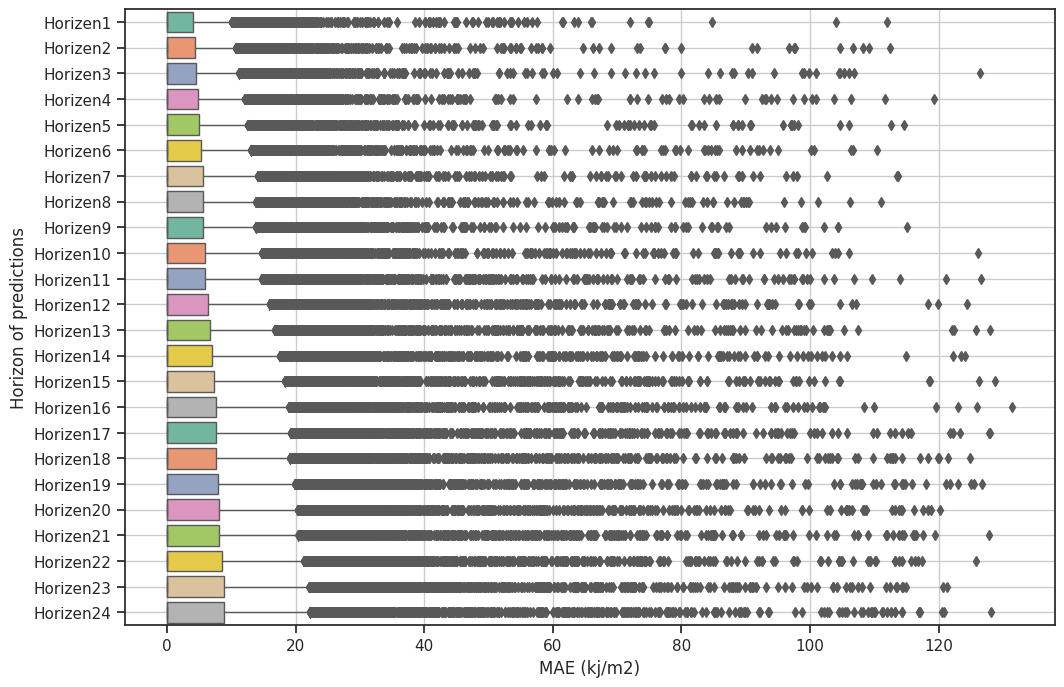

In [ ]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(12, 8))
#ax.set_xscale("log")
ax = sns.boxplot(data=metric_plot, orient="h", palette="Set2", linewidth=1)
ax.xaxis.grid(True)
ax.yaxis.grid(True)
#plt.title('Example Plot')
# Set x-axis label
plt.xlabel('MAE (kj/m2)')
# Set y-axis label
plt.ylabel('Horizon of predictions')
#boxplot If you used it, you should remove scale = 'linear'
#boxenplot if you used it, you can use scale = 'linear'

In [ ]:
# Make predictions on the test data
predictions1 = Analyze_df.loc[66:90, 'shifted_pt1']
Real = Analyze_df.loc[66:90, 'Heating']
# Calculate the standard error of the residuals
residuals1 = Real - predictions1
residual_std = np.std(residuals1)
# Set the desired confidence level (e.g., 95%)
confidence_level = 0.95
# Calculate the critical value based on the confidence level
critical_value = 1.96  # For a 95% confidence interval (assuming a normal distribution)
# Calculate the confidence interval for each predicted value
confidence_interval_lower = predictions1 - critical_value * residual_std
confidence_interval_upper = predictions1 + critical_value * residual_std

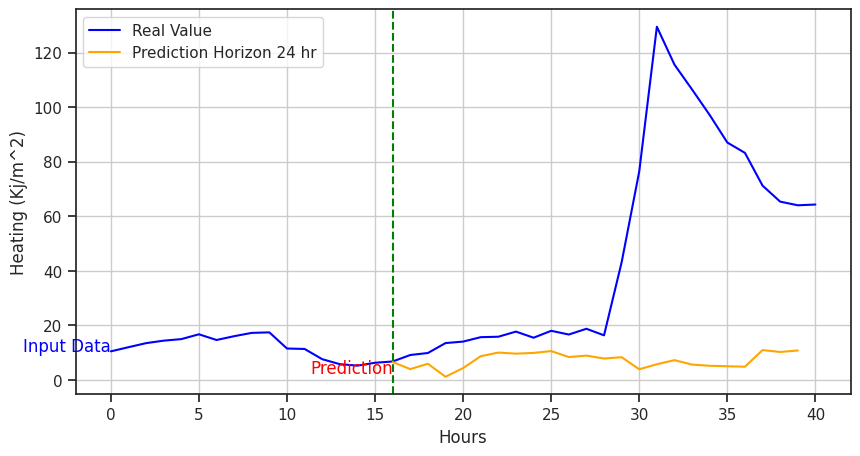

In [ ]:
column_start_index = 11  # Starting column index for the variables
row_start_index = 100  # Starting row index for the variables

List_prediction = []
variable_names = []

# Generate the variables dynamically
for i in range(24):
    column_index = column_start_index + i
    row_index = row_start_index + i
    variable_name = f'H{i + 1}'  # Variable name based on the index
    globals()[variable_name] = Analyze_df.iloc[row_index, column_index]  # Create the variable
    List_prediction.append(globals()[variable_name])  # Add the variable to the list
    variable_names.append(variable_name)  # Keep track of the variable names

# Select the desired ranges of data
first_part = Analyze_df.loc[984:1024, 'Heating']
second_part = Analyze_df.loc[1000:1024, 'shifted_pt1']
third_part = List_prediction

plt.figure(figsize=(10, 5))

# Plot the line chart with different colors for each part
x_values = range(len(first_part))  # Use the length of the first_part as x-values
plt.plot(x_values, first_part, color='blue', label='Real Value')
#plt.plot(x_values[16:], second_part, color='red', label='Prediction Horizon 1 hr')  # Use x_values[16:] for the second part

# Shift the third_part plot by 16
x_values_shifted = range(16, 16 + len(third_part))  # Create shifted x-values starting from 16
plt.plot(x_values_shifted, third_part, color='orange', label='Prediction Horizon 24 hr')

# Add grid
plt.text(0, first_part.iloc[0], 'Input Data', ha='right', color='blue')
# Add prediction label
plt.text(16, second_part.iloc[0], 'Prediction', ha='right', color='red')
plt.grid(True)
plt.axvline(x=16, color='green', linestyle='--')  # Adjust the x-value for the vertical line
plt.legend(loc='upper right')
plt.xlabel('Hours')
plt.ylabel('Heating (Kj/m^2)')
plt.legend()
plt.show()


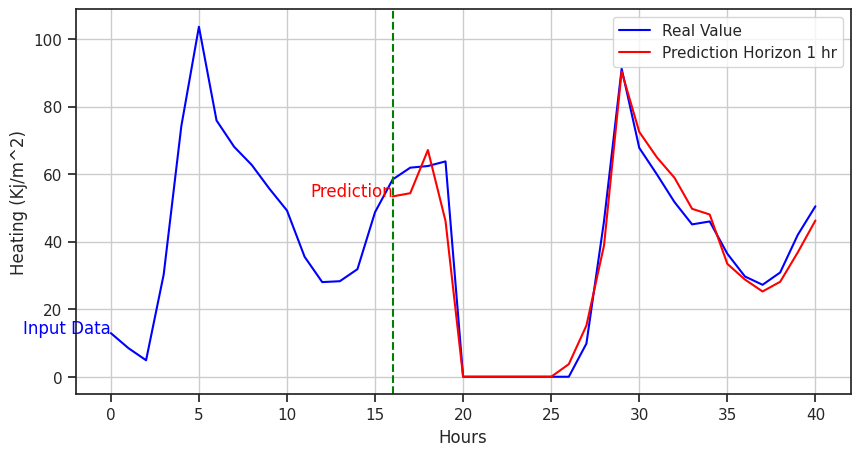

In [ ]:
# Select the desired ranges of data
first_part = Analyze_df.loc[50:90, 'Heating']
second_part = Analyze_df.loc[66:90, 'shifted_pt1']
plt.figure(figsize=(10, 5))

# Plot the line chart with different colors for each part
x_values = range(len(first_part))  # Use the length of the first_part as x-values
plt.plot(x_values, first_part, color='blue', label='Real Value')
plt.plot(x_values[16:], second_part, color='red', label='Prediction Horizon 1 hr')  # Use x_values[16:] for the second part

# Add grid
plt.text(0, first_part.iloc[0], 'Input Data', ha='right', color='blue')
# Add prediction label
plt.text(16, second_part.iloc[0], 'Prediction', ha='right', color='red')
plt.grid(True)
plt.axvline(x=16, color='green', linestyle='--')  # Adjust the x-value for the vertical line
plt.legend(loc='upper right')
plt.xlabel('Hours')
plt.ylabel('Heating (Kj/m^2)')
plt.legend()
plt.show()


# Accuracy of preciting days in a boxplot (7 days)

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
# Create empty series to store the results
d_series = []
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    # Append the mean values to the series
    d_series.append(mean_values)
# Create a dictionary to store the metrics



In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Create a dictionary to store the metrics
metrics_dict = {'Index': []}

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
d_series = []

# Iterate over each value in unique_values
for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Iterate over each row in the filtered DataFrame
    for index, row in filtered_df.iterrows():
        y_true = row['Heating']
        mean_values = row[prediction_columns]

        # Calculate MAE using the mean value of all predictions
        y_pred_mean = mean_values.mean()
        mae = mean_absolute_error([y_true], [y_pred_mean])
        column_name = f'MAE_{value}'  # Unique column name for each day
        metrics_dict['Index'].append(index)
        metrics_dict[column_name] = metrics_dict.get(column_name, []) + [mae]

# Create a DataFrame from the metrics dictionary



In [ ]:
import pandas as pd
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['dayofw'].unique()
filtered_dfs = []
mae_series = []
# Create empty series to store the results
d_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['dayofw'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df['Heating']

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error(y_true_day, mean_values)
    mae_series.append(mae)

    # Append the mean values to the series
    d_series.append(mean_values)
# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Create separate series with meaningful names
d0 = d_series[0]
d1 = d_series[1]
d2 = d_series[2]
d3 = d_series[3]
d4 = d_series[4]
d5 = d_series[5]
d6 = d_series[6]

mae0 = mae_series[0]
mae1 = mae_series[1]
mae2 = mae_series[2]
mae3 = mae_series[3]
mae4 = mae_series[4]
mae5 = mae_series[5]
mae6 = mae_series[6]

In [ ]:
filtered_dfs[0]

,DryBulbTemperature,DirectNormalRadiation,OccupancySchedule,dayofw,hours,months,datee,Heating,holiday_name,holiday_bool,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
39,-8.2,0.0,0.95,2.0,15,1,2019-01-02,110.244676,NaN,0,...,130.876022,123.953789,137.436935,135.030457,145.380386,143.711502,135.153229,132.717087,131.480057,129.108154
40,-7.3,0.0,0.95,2.0,16,1,2019-01-02,103.522451,NaN,0,...,138.134232,139.514664,128.007690,143.288528,138.913208,148.221283,137.249100,134.849213,126.832245,127.380409
41,-7.4,0.0,0.30,2.0,17,1,2019-01-02,111.728576,NaN,0,...,149.187302,146.818085,148.205551,136.566147,152.630646,133.291122,146.821884,142.143478,140.566254,135.711929
42,-6.9,0.0,0.10,2.0,18,1,2019-01-02,120.941033,NaN,0,...,156.632690,146.776413,153.738480,153.947922,151.777969,142.407425,143.495865,155.996704,157.137741,148.875671
43,-6.3,0.0,0.10,2.0,19,1,2019-01-02,119.705436,NaN,0,...,155.004349,161.374588,149.820023,158.353439,156.094391,151.297043,148.692230,152.920639,165.912445,165.175812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,-5.5,0.0,0.00,2.0,19,12,2019-12-25,4.076103,Christmas Day,1,...,78.713242,78.571342,77.971764,82.375671,80.897438,82.699036,77.985489,77.839973,76.521126,74.864265
8612,-5.3,0.0,0.00,2.0,20,12,2019-12-25,3.652697,Christmas Day,1,...,78.628479,85.815636,80.206955,79.902481,83.717247,82.597656,81.355171,77.058670,83.876915,77.694794
8613,-5.1,0.0,0.00,2.0,21,12,2019-12-25,4.149749,Christmas Day,1,...,29.189823,78.827904,82.391212,81.082062,77.749542,80.287811,67.429176,70.796043,58.110615,82.050804
8614,-4.7,0.0,0.00,2.0,22,12,2019-12-25,4.228820,Christmas Day,1,...,11.059510,5.097158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
true_val = y_true_day
pred_val = mean_values

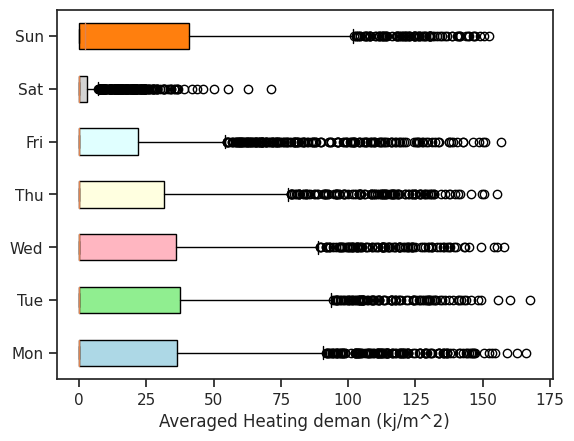

In [ ]:
# Combine the series into a list
series_list = [d0, d1, d2, d3, d4, d5, d6]
mae_list = [mae0,mae1,mae2,mae3,mae4,mae5,mae6]
# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating deman (kj/m^2)')

# Display the plot
plt.show()


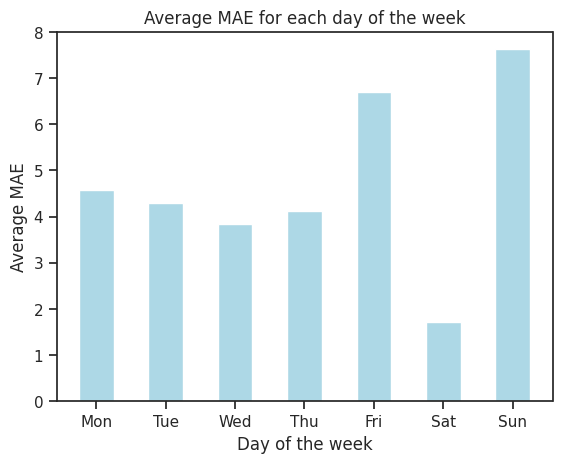

In [ ]:
# Combine the series into a list
series_list = [d0, d1, d2, d3, d4, d5, d6]
mae_list = [mae0, mae1, mae2, mae3, mae4, mae5, mae6]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Set a title and labels for the plot
plt.title('Average MAE for each day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average MAE')

# Display the plot
plt.show()


# Accuracy of predicting Monthly

In [ ]:
# Assuming your DataFrame is named 'df' and the column of interest is named 'column_name'
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['months'].unique()
unique_values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
import pandas as pd


# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'


# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['months'].unique()
filtered_dfs = []
mae_series_m = []
# Create empty series to store the results
m_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['months'] == value]
    filtered_dfs.append(filtered_df)


    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_month = filtered_df.Heating


    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error([y_true_month], [mean_values])
    mae_series_m.append(mae)


    # Append the mean values to the series
    m_series.append(mean_values)


# Create separate series with meaningful names
# Assuming you have a list named 'd_series' with the desired data


m0 = m_series[0]
m1 = m_series[1]
m2 = m_series[2]
m3 = m_series[3]
m4 = m_series[4]
m5 = m_series[5]
m6 = m_series[6]
m7 = m_series[7]
m8 = m_series[8]
m9 = m_series[9]
m10 = m_series[10]
m11 = m_series[11]


mae0 = mae_series_m[0]
mae1 = mae_series_m[1]
mae2 = mae_series_m[2]
mae3 = mae_series_m[3]
mae4 = mae_series_m[4]
mae5 = mae_series_m[5]
mae6 = mae_series_m[6]
mae7 = mae_series_m[7]
mae8 = mae_series_m[8]
mae9 = mae_series_m[9]
mae10 = mae_series_m[10]
mae11 = mae_series_m[11]



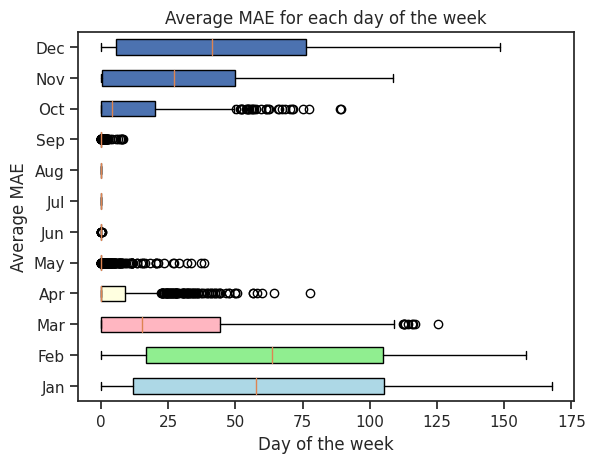

In [ ]:
# Combine the series into a list
series_list = [m0, m1, m2, m3, m4, m5, m6,m7 ,m8 ,m9 ,m10 ,m11 ]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


# Set a title and labels for the plot
plt.title('Average MAE for each day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Average MAE')


# Display the plot
plt.show()



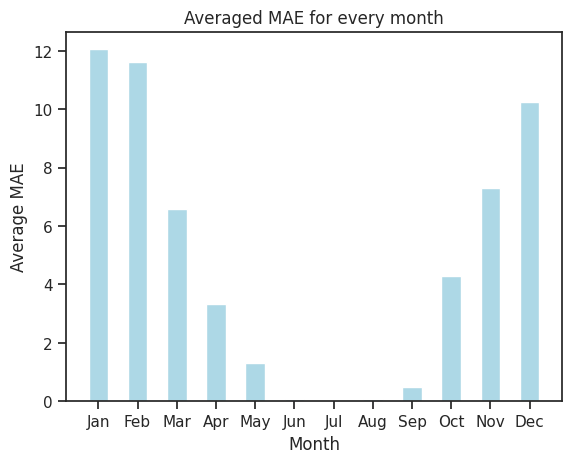

In [ ]:
mae_list = [mae0,mae1,mae2,mae3,mae4,mae5,mae6,mae7,mae8,mae9,mae10,mae11]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
plt.xlabel('Month')
plt.ylabel('Average MAE')

# Display the plot
plt.show()


# MAE and VAlues for evey hour

In [ ]:
# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['hours'].unique()


In [ ]:
unique_values

array([15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14])

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['hours'].unique()

filtered_dfs = []
mae_series = []
# Create empty series to store the results
h_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['hours'] == value]
    filtered_dfs.append(filtered_df)


    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df.Heating

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error([y_true_day], [mean_values])
    mae_series.append(mae)
    # Append the mean values to the series
    h_series.append(mean_values)

# Create separate series with meaningful names

h0 = h_series[0]
h1 = h_series[1]
h2 = h_series[2]
h3 = h_series[3]
h4 = h_series[4]
h5 = h_series[5]
h6 = h_series[6]
h7 = h_series[7]
h8 = h_series[8]
h9 = h_series[9]
h10 = h_series[10]
h11 = h_series[11]
h12 = h_series[12]
h13 = h_series[13]
h14 = h_series[14]
h15 = h_series[15]
h16 = h_series[16]
h17 = h_series[17]
h18 = h_series[18]
h19 = h_series[19]
h20 = h_series[20]
h21 = h_series[21]
h22 = h_series[22]
h23 = h_series[23]

mae0 = mae_series[0]
mae1 = mae_series[1]
mae2 = mae_series[2]
mae3 = mae_series[3]
mae4 = mae_series[4]
mae5 = mae_series[5]
mae6 = mae_series[6]
mae7 = mae_series[7]
mae8 = mae_series[8]
mae9 = mae_series[9]
mae10 = mae_series[10]
mae11 = mae_series[11]
mae12 = mae_series[12]
mae13 = mae_series[13]
mae14 = mae_series[14]
mae15 = mae_series[15]
mae16 = mae_series[16]
mae17 = mae_series[17]
mae18 = mae_series[18]
mae19 = mae_series[19]
mae20 = mae_series[20]
mae21 = mae_series[21]
mae22 = mae_series[22]
mae23 = mae_series[23]

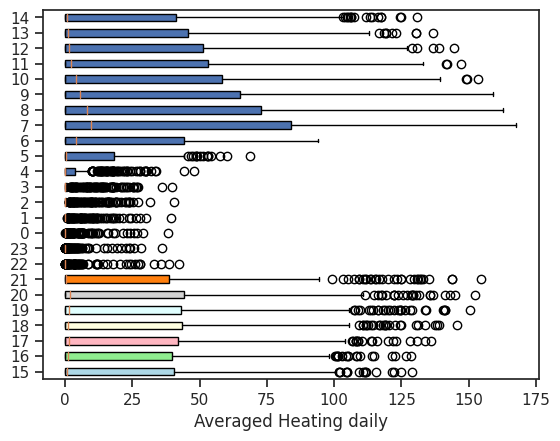

In [ ]:
series_list = [h0, h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15, h16, h17, h18, h19, h20, h21, h22, h23]
# Create a figure and axis
fig, ax = plt.subplots()
# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating daily')
# Display the plot
plt.show()

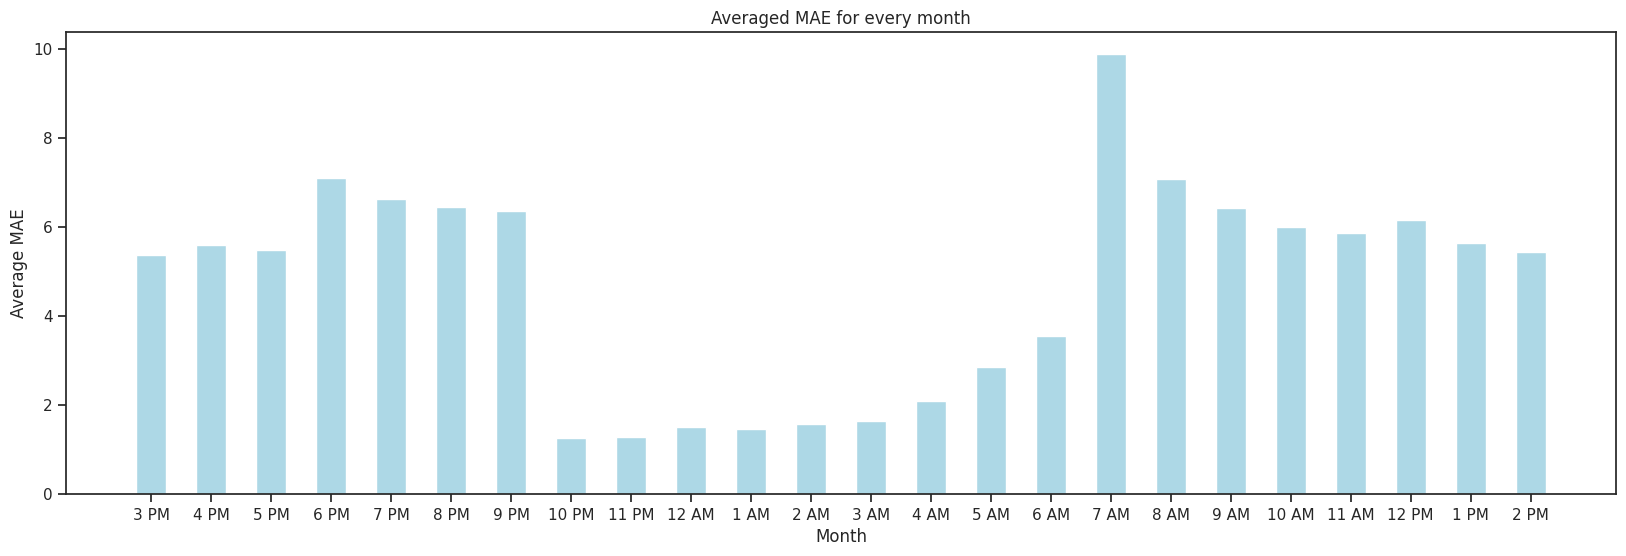

In [ ]:
mae_list = [mae0, mae1, mae2, mae3, mae4, mae5, mae6, mae7, mae8, mae9, mae10, mae11, mae12, mae13, mae14, mae15, mae16, mae17, mae18, mae19, mae20, mae21, mae22, mae23]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(20, 6)) 

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels( ['3 PM', '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM', '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
plt.xlabel('Month')
plt.ylabel('Average MAE')
# Display the plot
plt.show()

# Holidays

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'Analyze_df' and the column of interest is named 'column_name'

# Filter the DataFrame for each unique value in the column
unique_values = Analyze_df['holiday_bool'].unique()

filtered_dfs = []
mae_series = []
# Create empty series to store the results
h_series = []

for value in unique_values:
    filtered_df = Analyze_df[Analyze_df['holiday_bool'] == value]
    filtered_dfs.append(filtered_df)

    # Get the columns of interest
    prediction_columns = filtered_df.columns[11:35]  # Assuming the prediction columns start from the 12th column
    y_true_day = filtered_df.Heating

    # Calculate the mean value for each row within the specified columns
    mean_values = filtered_df[prediction_columns].mean(axis=1)
    mae = mean_absolute_error([y_true_day], [mean_values])
    mae_series.append(mae)
    # Append the mean values to the series
    h_series.append(mean_values)

h0 = h_series[0]
h1 = h_series[1]

mae0 = mae_series[0]
mae1 = mae_series[1]

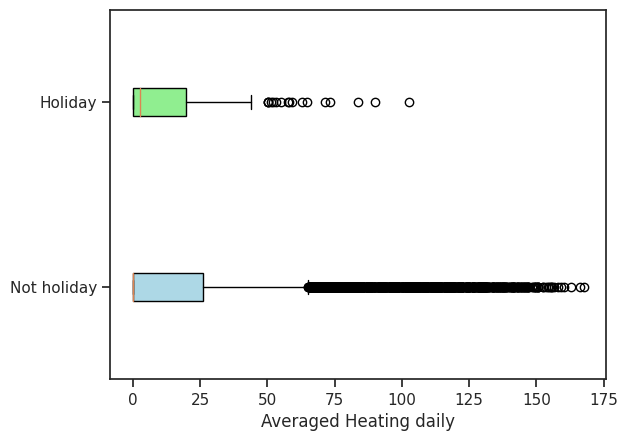

In [ ]:
series_list = [h0, h1]

fig, ax = plt.subplots()
# Create the boxplot
bp = ax.boxplot(series_list, vert=False, patch_artist=True)

# Customize the boxplot appearance
#colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightgrey', 'tab:orange']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels to the x-axis
ax.set_yticklabels(['Not holiday', 'Holiday'])

# Set a title and labels for the plot
#plt.title('Average heating daily')
plt.xlabel('Averaged Heating daily')
# Display the plot
plt.show()

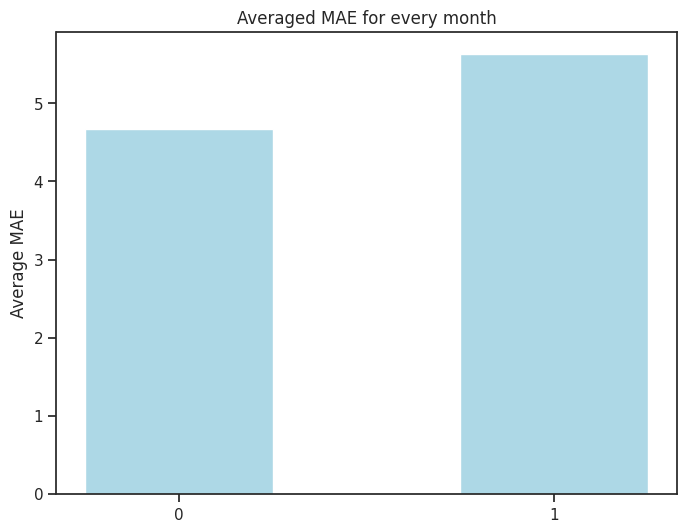

In [ ]:
mae_list = [mae0, mae1]
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6)) 

# Create the bar plot
bar_width = 0.5
bar_positions = np.arange(len(mae_list))

rects = ax.bar(bar_positions, mae_list, width=bar_width, color='lightblue')

# Add labels to the x-axis
ax.set_xticks(bar_positions)
ax.set_xticklabels( ['0', '1'])

# Set a title and labels for the plot
plt.title('Averaged MAE for every month')
#plt.xlabel('Month')
plt.ylabel('Average MAE')
# Display the plot
plt.show()

In [ ]:
unique_values = Analyze_df['holiday_bool'].unique()
unique_values

array([0, 1])

# perfromance at coldest days + at worth prediction + at best predictions ( go fo prediction t+1 and t+24


In [ ]:
sorted_df = Analyze_df.sort_values('DryBulbTemperature', ascending=True)

In [ ]:
filtered_df = Analyze_df[Analyze_df['datee'] == '2019-01-30']
filtered_df = filtered_df.reset_index(drop=True)

In [ ]:
filtered_df

,DryBulbTemperature,DirectNormalRadiation,OccupancySchedule,dayofw,hours,months,datee,Heating,holiday_name,holiday_bool,...,shifted_pt15,shifted_pt16,shifted_pt17,shifted_pt18,shifted_pt19,shifted_pt20,shifted_pt21,shifted_pt22,shifted_pt23,shifted_pt24
0,-34.0,0.0,0.000000,2.0,0,1,2019-01-30,37.834993,NaN,0,...,0.000000,19.151834,3.688028,8.984178,0.000000,17.913475,0.000000,0.000000,0.000000,0.000000
1,-34.0,0.0,0.000000,2.0,1,1,2019-01-30,31.122935,NaN,0,...,17.095003,23.957285,19.564922,20.328001,0.000000,19.534843,17.345915,0.000000,0.000000,0.000000
2,-33.9,0.0,0.000000,2.0,2,1,2019-01-30,39.171414,NaN,0,...,25.219374,28.586802,26.516127,27.766336,0.000000,21.674936,18.837309,0.000000,26.957098,0.000000
3,-34.1,0.0,0.000000,2.0,3,1,2019-01-30,30.371462,NaN,0,...,23.074011,31.027586,28.804878,27.322626,32.630539,27.523653,22.780413,20.808083,27.999634,22.747288
4,-34.4,0.0,0.000000,2.0,4,1,2019-01-30,39.433572,NaN,0,...,32.907413,27.529917,32.623985,31.254101,28.918161,31.358797,28.210779,23.379906,25.884441,22.348530
5,-34.2,0.0,0.000000,2.0,5,1,2019-01-30,42.185735,NaN,0,...,41.551842,46.974915,43.839035,52.650116,41.996449,48.427818,40.382782,39.441971,37.051388,34.685429
6,-34.4,0.0,0.100000,2.0,6,1,2019-01-30,79.476330,NaN,0,...,77.791649,74.589714,85.070129,72.986984,82.558830,73.428383,78.089516,78.037216,67.867271,60.192471
7,-34.4,0.0,0.200000,2.0,7,1,2019-01-30,193.826542,NaN,0,...,155.962708,165.468430,160.582626,176.177551,146.474548,166.861557,148.652954,158.142960,157.037048,128.307648
8,-34.8,0.0,0.950000,2.0,8,1,2019-01-30,184.134013,NaN,0,...,166.669586,155.128815,156.282761,160.904160,167.689575,141.215958,155.167786,148.692963,151.811844,152.660919
9,-33.8,189.0,0.950000,2.0,9,1,2019-01-30,179.010093,NaN,0,...,152.281769,154.406174,150.406586,153.411392,154.206421,154.179092,139.637970,145.955490,135.952942,143.077667


In [ ]:
# index from 696 to 719 are for 2019-1-30
mae_H1 = metrics_df.Horizen1

In [ ]:
# Plot the line chart with different colors for each column
#plt.plot(x_values, filtered_df['Heating'], color='blue', label='Real value')
#plt.plot(x_values, filtered_df['shifted_pt1'], color='red', label='Horizon 1')
#plt.plot(x_values, filtered_df['shifted_pt24'], color='green', label='Horizon 24')
#plt.plot(x_values, mae_H1, color='orange', label='mae1')


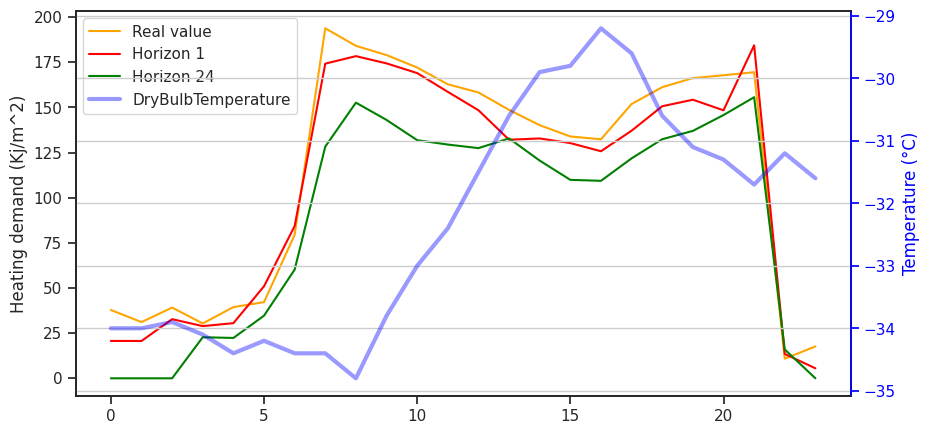

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing the columns

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot the first three lines on ax1
ax1.plot(filtered_df.index, filtered_df['Heating'], color='orange', label='Real value')
ax1.plot(filtered_df.index, filtered_df['shifted_pt1'], color='red', label='Horizon 1')
ax1.plot(filtered_df.index, filtered_df['shifted_pt24'], color='green', label='Horizon 24')

# Create ax2 as a twin of ax1
ax2 = ax1.twinx()
ax2.plot(filtered_df.index, filtered_df['DryBulbTemperature'], color='blue', alpha=0.4, linewidth=3, label='DryBulbTemperature')


# Set labels and colors for ax2
ax2.set_ylabel('Temperature (°C)', color='blue')
ax2.spines['right'].set_color('blue')
ax2.tick_params(axis='y', colors='blue')

# Set label for ax1
ax1.set_ylabel('Heating demand (Kj/m^2)')

# Set common x-label
plt.xlabel('Hours')

# Combine the legends from both ax1 and ax2
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper left')

# Show the grid
plt.grid(True)

# Display the plot
plt.show()


# putting some figures alongside each other

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create sample data for each section
data_section1 = pd.DataFrame({'x': range(10), 'y': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]})
data_section2 = pd.DataFrame({'x': range(10), 'y': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]})
data_section3 = pd.DataFrame({'x': range(10), 'y': [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]})

# Set up the figure and subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 10), sharey=True)

# Plot data and set titles for each section
ax1.plot(data_section1['x'], data_section1['y'], linestyle='-', color='blue', linewidth=2)
ax1.set_title('Section 1')
ax1.set_ylabel('Y-axis')  # Set the y-axis label only for the first subplot
ax1.set_xlabel('X-axis')  # Set the x-axis label for the first subplot

ax2.plot(data_section2['x'], data_section2['y'], linestyle='--', color='red', linewidth=2)
ax2.set_title('Section 2')
ax2.set_xlabel('X-axis')  # Set the x-axis label for the second subplot

ax3.plot(data_section3['x'], data_section3['y'], linestyle=':', color='green', linewidth=2)
ax3.set_title('Section 3')
ax3.set_xlabel('X-axis')  # Set the x-axis label for the third subplot

# Set common x-axis label
fig.text(0.5, 0.04, 'X-axis', ha='center')

# Set background color and gridlines
fig.patch.set_facecolor('white')  # Set the background color to white
ax1.grid(True)  # Enable gridlines for the first subplot
ax2.grid(True)  # Enable gridlines for the second subplot
ax3.grid(True)  # Enable gridlines for the third subplot
# Show the plot
plt.show()